# Script to make a collage from images

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [2]:
# Image directories
source_dir = 'source'
results_dir = 'results'

## Example 1 : Volcano

In [3]:
os.listdir(source_dir)

['Cumbre Vieja 21-09-26 at 10.11.11 .png',
 'Cumbre Vieja 21-09-26 at 10.06.58 .png',
 '.DS_Store',
 'Cumbre Vieja 21-09-26 at 10.05.19 .png',
 'N_Tees_Image.png',
 'quebec_bridge.jpg',
 'Cumbre Vieja 21-09-26 at 10.09.18 .png',
 '210720photo_eglise.jpg',
 'Cumbre Vieja 21-09-26 at 10.10.45 .png',
 'Cumbre Vieja 21-09-26 at 10.08.09 .png']

In [4]:
filenames = [
    'Cumbre Vieja 21-09-26 at 10.08.09 .png',
    'Cumbre Vieja 21-09-26 at 10.09.18 .png',
    'Cumbre Vieja 21-09-26 at 10.10.45 .png',
    'Cumbre Vieja 21-09-26 at 10.11.11 .png',
    'Cumbre Vieja 21-09-26 at 10.05.19 .png',
    'Cumbre Vieja 21-09-26 at 10.06.58 .png'
]

source_images = [
    Image.open(os.path.join(source_dir, f)) 
    for f in filenames
]
len(source_images)

6

***Images must all have the same dimensions!***

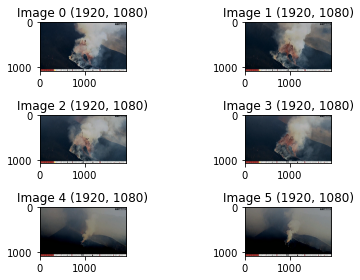

In [5]:
n = len(source_images)
if n >= 3:
    n_rows = 3
    n_cols = (n-1) // 3 + 1
else:
    n_rows = n
    n_cols = 1

fig, axes = plt.subplots(n_rows, n_cols)

ri, ci = np.indices((n_rows, n_cols))
for i, (im, r, c) in enumerate(zip(source_images, ri.flatten(), ci.flatten())):
    ax = axes[r, c]
    ax.imshow(im)
    ax.set_title(f"Image {i} {im.size}")
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    #for side in ['top', 'bottom', 'left', 'right']:
    #    ax.spines[side].set_visible(False)

plt.tight_layout()
plt.show()

In [6]:
border_size = 40

# Choose layout for collage
layout = np.array([[0, 1], [2, 3], [4, 5]])

layout

array([[0, 1],
       [2, 3],
       [4, 5]])

In [7]:
avg_color = np.vstack([np.asarray(im).reshape(-1,4) for im in source_images]).mean(axis=0)
border_color = tuple((avg_color).astype(int))
avg_color, border_color

(array([ 73.15180258,  78.16499558,  83.15340238, 255.        ]),
 (73, 78, 83, 255))

In [8]:
h_elements = [border_size]
for i in layout[0]:
    h_elements = h_elements + [source_images[i].size[0], border_size]
v_elements = [border_size]
for j in layout[:,0]:
    v_elements = v_elements + [source_images[j].size[1], border_size]
h_elements, v_elements

([40, 1920, 40, 1920, 40], [40, 1080, 40, 1080, 40, 1080, 40])

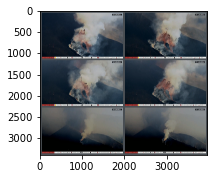

In [9]:
width = sum(h_elements)
height = sum(v_elements)

mode = source_images[0].mode
collage = Image.new(mode, (width, height), color=border_color)

y = border_size
for j in range(layout.shape[1]):
    x = border_size
    for i in range(layout.shape[0]):
        im = source_images[layout[i, j]]
        collage.paste(im, (y, x))
        x += im.size[1] + border_size
    y += im.size[0] + border_size

collage.save(os.path.join(results_dir, 'volcano_collage.png'))

fig, ax = plt.subplots(figsize=(3,8))
plt.imshow(collage)
plt.show()

## Example 2 : Church halftone images

In [10]:
os.listdir(results_dir)

['210720photo_eglise_crop_0_0.png',
 '210720photo_eglise_crop_2_0.png',
 'volcano_collage.png',
 '.DS_Store',
 'quebec_bridge_crop_0_4_halftoned.png',
 'quebec_bridge_crop_0_0_halftoned.png',
 'N_Tees_Image_crop_0_1_halftoned.png',
 '210720photo_eglise_crop_1_0.png',
 'N_Tees_Image_crop_0_2_halftoned.png',
 '210720photo_eglise_crop_2_0_halftoned.png',
 'quebec_bridge_crop_0_3_halftoned.png',
 'quebec_bridge_crop_0_6.png',
 'N_Tees_Image_crop_0_3_halftoned.png',
 'quebec_bridge_crop_0_5.png',
 'quebec_bridge_crop_0_2_halftoned.png',
 'quebec_bridge_crop_0_4.png',
 'quebec_bridge_crop_0_6_halftoned.png',
 'quebec_bridge_crop_0_0.png',
 'quebec_bridge_crop_0_1_halftoned.png',
 'quebec_bridge_crop_0_5_halftoned.png',
 'quebec_bridge_crop_0_1.png',
 'quebec_bridge_crop_0_3.png',
 '210720photo_eglise_crop_0_0_halftoned.png',
 'quebec_bridge_crop_0_2.png',
 'N_Tees_Image_crop_0_0_halftoned.png',
 'N_Tees_Image_crop_0_3.png',
 'tiled_halftone_example_screenshot.png',
 'eglise_collage.jpg',
 'N

In [11]:
filenames = [
    '210720photo_eglise_crop_0_0_halftoned.png',
    '210720photo_eglise_crop_1_0_halftoned.png',
    '210720photo_eglise_crop_2_0_halftoned.png'
]

source_images = [
    Image.open(os.path.join(results_dir, f)) 
    for f in filenames
]
len(source_images)

3

***Images must all have the same dimensions!***

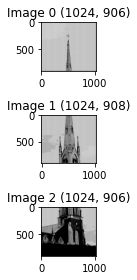

In [12]:
fig, axes = plt.subplots(len(source_images), 1)

for i, (im, ax) in enumerate(zip(source_images, axes)):
    ax.imshow(im)
    ax.set_title(f"Image {i} {im.size}")
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    #for side in ['top', 'bottom', 'left', 'right']:
    #    ax.spines[side].set_visible(False)

plt.tight_layout()
plt.show()

In [13]:
border_size = 40
border_color = (255, 255, 255, 255)

# Choose layout for collage
layout = np.array([[0], [1], [2]])

layout

array([[0],
       [1],
       [2]])

In [14]:
h_elements = [border_size]
for i in layout[0]:
    h_elements = h_elements + [source_images[i].size[0], border_size]
v_elements = [border_size]
for j in layout[:,0]:
    v_elements = v_elements + [source_images[j].size[1], border_size]
h_elements, v_elements

([40, 1024, 40], [40, 906, 40, 908, 40, 906, 40])

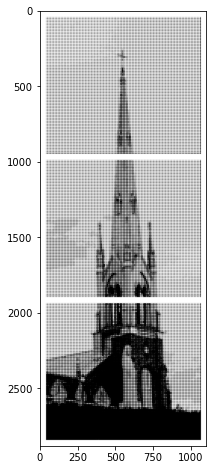

In [15]:
width = sum(h_elements)
height = sum(v_elements)

mode = source_images[0].mode
collage = Image.new(mode, (width, height), color=border_color)

y = border_size
for j in range(layout.shape[1]):
    x = border_size
    for i in range(layout.shape[0]):
        im = source_images[layout[i, j]]
        collage.paste(im, (y, x))
        x += im.size[1] + border_size
    y += im.size[0] + border_size

collage.save(os.path.join(results_dir, 'eglise_collage.jpg'))

fig, ax = plt.subplots(figsize=(3,8))
plt.imshow(collage)
plt.show()